#### Disclaimer

ChatGPT was used for some plotting codes and learning PyTorch syntax. Some online public repositories were also used as reference on how to implement GANS 

#### References 
1. https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

2.  https://github.com/Ksuryateja/DCGAN-CIFAR10-pytorch/blob/master/gan_cifar.py

In [31]:
# Importing the necessary packages 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.utils as vutils

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

### Designating Hyperparameters for the GAN 


In [3]:
batch_size  = 64 
image_size = 28 * 28 
latent_size = 100 # Dimension of z vector (100 x 1) 
hidden_size = 256 
num_epochs = 200 
lr = 0.0002 

### Calling MNIST DATASET

In [4]:
# Normalizing function 
transform = transforms.Compose([
    transforms.ToTensor(), # Converts images to tensor object 
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images between -1 and 1
])

# Callint a Train dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [5]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

### Defining the Generator

Creating a class Generator which takes in the latent space and passes through some layers. 

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh()  # Outputs values between -1 and 1
        )
    
    def forward(self, z):
        return self.model(z)

### Defining the Discriminator 

Creating a class Discriminator which uses a sigmoid output layer for the classification task

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()  # Outputs a probability (between 0 and 1)
        )
    
    def forward(self, x):
        return self.model(x)

### Calling the Generator and Discriminator


In [8]:
# Create Generator and Discriminator
G = Generator()
D = Discriminator()

### Defining the Loss Function and Optimizer Used

In [9]:
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


# Creating storing functiongs for loss functions of discriminator and generator 
d_losses = []
g_losses = []

### Creating Label Functions 
Anything created by the Generator is Fake (Class = 0), anything from the MNIST is Class = 1

In [10]:
def real_labels(size):
    return torch.ones(size, 1).to(device)

def fake_labels(size):
    return torch.zeros(size, 1).to(device)

In [11]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G.to(device)
D.to(device)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [12]:
# Function to generate samples midway 
def generate_samples(generator, epoch, num_samples=16):
    z = torch.randn(num_samples, latent_size).to(device)
    generated_images = generator(z).view(num_samples, 28, 28).cpu().detach()

    # Visualize generated samples
    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.suptitle(f'Samples at Epoch {epoch}')
    plt.show()

# Training 

Epoch [0/200], d_loss: 0.6699568033218384, g_loss: 1.6596343517303467
Epoch [1/200], d_loss: 0.3459138870239258, g_loss: 3.319723606109619
Epoch [2/200], d_loss: 0.22765430808067322, g_loss: 4.076855659484863
Epoch [3/200], d_loss: 0.3550964891910553, g_loss: 4.303400039672852
Epoch [4/200], d_loss: 0.27781566977500916, g_loss: 3.219780445098877
Epoch [5/200], d_loss: 0.22853463888168335, g_loss: 4.978591442108154
Epoch [6/200], d_loss: 0.09428412467241287, g_loss: 4.474697113037109
Epoch [7/200], d_loss: 0.0949009507894516, g_loss: 6.339792251586914
Epoch [8/200], d_loss: 0.08714234828948975, g_loss: 5.258681297302246
Epoch [9/200], d_loss: 0.12743645906448364, g_loss: 4.105133056640625
Epoch [10/200], d_loss: 0.093268021941185, g_loss: 4.542693614959717
Epoch [11/200], d_loss: 0.4894906282424927, g_loss: 4.288825035095215
Epoch [12/200], d_loss: 0.2981777489185333, g_loss: 3.936918258666992
Epoch [13/200], d_loss: 0.11257429420948029, g_loss: 4.7087202072143555
Epoch [14/200], d_loss

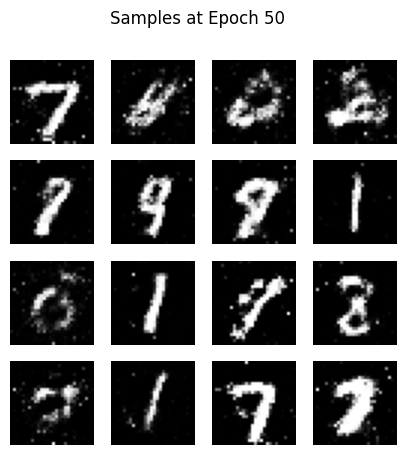

Epoch [51/200], d_loss: 0.7641342878341675, g_loss: 2.5189027786254883
Epoch [52/200], d_loss: 0.8034011721611023, g_loss: 3.0313560962677
Epoch [53/200], d_loss: 0.587632417678833, g_loss: 2.341507911682129
Epoch [54/200], d_loss: 0.9364162087440491, g_loss: 1.4079840183258057
Epoch [55/200], d_loss: 1.1879246234893799, g_loss: 1.6081626415252686
Epoch [56/200], d_loss: 0.9289641380310059, g_loss: 2.773390769958496
Epoch [57/200], d_loss: 0.9248675107955933, g_loss: 2.009803533554077
Epoch [58/200], d_loss: 1.0303620100021362, g_loss: 2.205474853515625
Epoch [59/200], d_loss: 0.9076551198959351, g_loss: 2.0583951473236084
Epoch [60/200], d_loss: 0.8662354946136475, g_loss: 1.695871353149414
Epoch [61/200], d_loss: 0.6792992353439331, g_loss: 2.011760711669922
Epoch [62/200], d_loss: 0.832599401473999, g_loss: 1.907923698425293
Epoch [63/200], d_loss: 0.777660608291626, g_loss: 1.941838026046753
Epoch [64/200], d_loss: 0.764613151550293, g_loss: 1.7833625078201294
Epoch [65/200], d_los

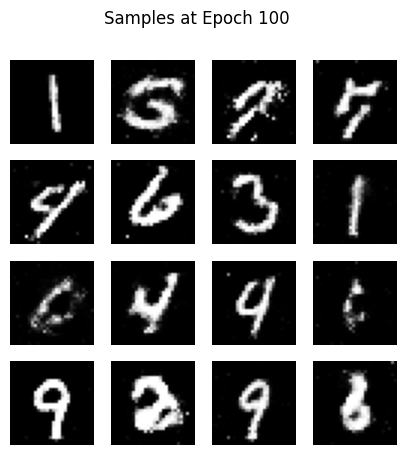

Epoch [101/200], d_loss: 0.8278584480285645, g_loss: 2.1722512245178223
Epoch [102/200], d_loss: 0.9586029052734375, g_loss: 1.3534003496170044
Epoch [103/200], d_loss: 1.0398675203323364, g_loss: 1.6576436758041382
Epoch [104/200], d_loss: 1.2056758403778076, g_loss: 1.5288503170013428
Epoch [105/200], d_loss: 0.7409584522247314, g_loss: 2.0123207569122314
Epoch [106/200], d_loss: 0.9694435000419617, g_loss: 1.556380271911621
Epoch [107/200], d_loss: 0.9896110892295837, g_loss: 1.5424480438232422
Epoch [108/200], d_loss: 1.0256295204162598, g_loss: 1.4403846263885498
Epoch [109/200], d_loss: 0.8937124609947205, g_loss: 1.3037283420562744
Epoch [110/200], d_loss: 0.8773934841156006, g_loss: 0.9239110946655273
Epoch [111/200], d_loss: 0.8101487159729004, g_loss: 1.6157200336456299
Epoch [112/200], d_loss: 0.8463904857635498, g_loss: 1.2918357849121094
Epoch [113/200], d_loss: 1.0686302185058594, g_loss: 0.9751644730567932
Epoch [114/200], d_loss: 0.8316322565078735, g_loss: 1.8443429470

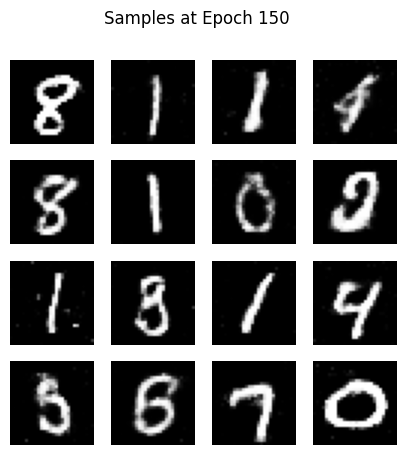

Epoch [151/200], d_loss: 1.0194495916366577, g_loss: 1.6615744829177856
Epoch [152/200], d_loss: 1.273646354675293, g_loss: 1.663871169090271
Epoch [153/200], d_loss: 1.012067198753357, g_loss: 1.1071150302886963
Epoch [154/200], d_loss: 0.9278254508972168, g_loss: 1.2409266233444214
Epoch [155/200], d_loss: 0.751758337020874, g_loss: 1.3476290702819824
Epoch [156/200], d_loss: 0.919478714466095, g_loss: 1.1730495691299438
Epoch [157/200], d_loss: 0.9868674278259277, g_loss: 1.4269657135009766
Epoch [158/200], d_loss: 1.1597248315811157, g_loss: 1.3002233505249023
Epoch [159/200], d_loss: 1.1949725151062012, g_loss: 1.6091316938400269
Epoch [160/200], d_loss: 0.9976617097854614, g_loss: 1.3597925901412964
Epoch [161/200], d_loss: 1.304419755935669, g_loss: 1.3903653621673584
Epoch [162/200], d_loss: 0.8988003730773926, g_loss: 1.60036301612854
Epoch [163/200], d_loss: 1.0750772953033447, g_loss: 1.3204402923583984
Epoch [164/200], d_loss: 1.082543134689331, g_loss: 1.142266035079956
Ep

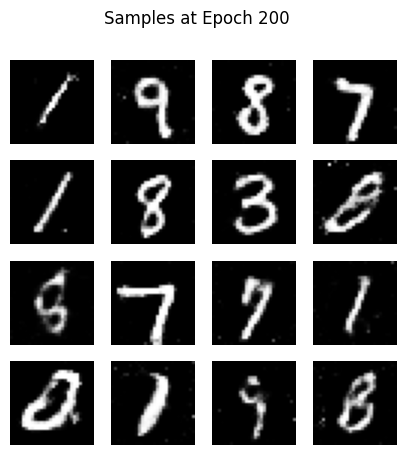

In [13]:
# Training loop
for epoch in range(num_epochs):
    d_loss_epoch = 0.0
    g_loss_epoch = 0.0
    
    for i, (images, _) in enumerate(train_loader):
        # Flatten images
        images = images.view(images.size(0), -1).to(device)
        
        # Create labels for real and fake images
        real = real_labels(images.size(0))
        fake = fake_labels(images.size(0))
        
        # ============= Train Discriminator =============
        optimizer_D.zero_grad()
        
        # Real images
        outputs_real = D(images)
        d_loss_real = criterion(outputs_real, real)
        
        # Fake images
        z = torch.randn(images.size(0), latent_size).to(device)  # Sample random noise
        fake_images = G(z)
        outputs_fake = D(fake_images)
        d_loss_fake = criterion(outputs_fake, fake)
        
        # Total Discriminator loss and backprop
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()
        
        # ============= Train Generator =============
        optimizer_G.zero_grad()
        
        # Generate fake images and try to fool the discriminator
        z = torch.randn(images.size(0), latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We want the generator to maximize the probability that fake images are classified as real
        g_loss = criterion(outputs, real)
        g_loss.backward()
        optimizer_G.step()

        # Accumulate losses
        d_loss_epoch += d_loss.item()
        g_loss_epoch += g_loss.item()
        
        # if (i+1) % 400 == 0:
        #     print(f"Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(train_loader)}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

    # Printing each loss at every epoch
    print(f"Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")
    
    # Store the average losses for this epoch
    d_losses.append(d_loss_epoch / len(train_loader))
    g_losses.append(g_loss_epoch / len(train_loader))
    
    # Generate samples after 10, 50, and 100 epochs
    if epoch in [50, 100, 150]:
        generate_samples(G, epoch)

# Generate final samples after the last epoch
generate_samples(G, num_epochs)

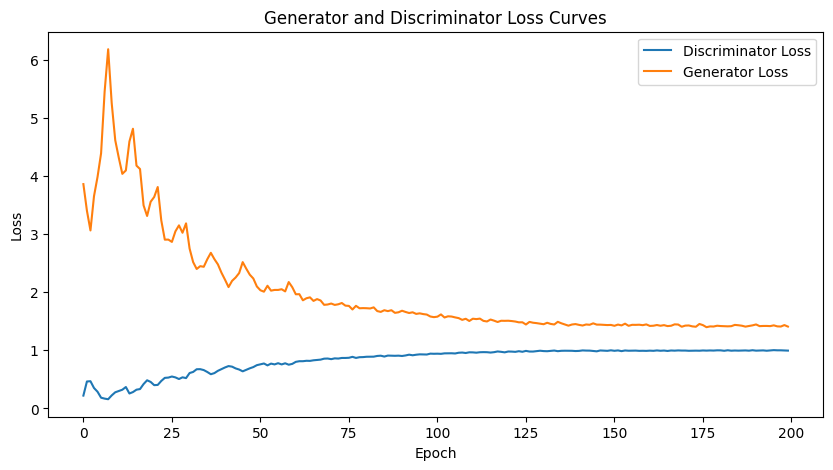

In [14]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Curves")
plt.legend()
plt.show()

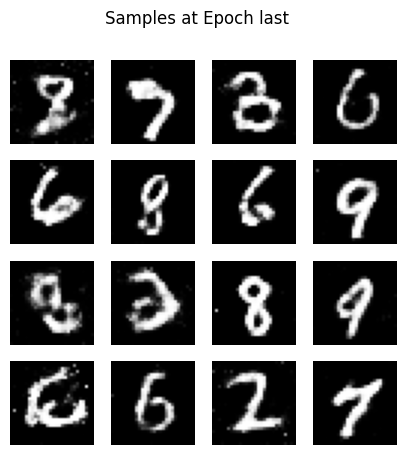

In [15]:
generate_samples(G, "last")


### Latent Space Interpolation

In [63]:
z1 = torch.randn(1, latent_size, device=device)
z2 = torch.randn(1, latent_size, device=device)


In [64]:
z_interp = torch.zeros((7, latent_size))
z_interp[0, :] = z1 
z_interp[1, :] = z1*0.90 + z2*0.10
z_interp[2, :] = z1*0.75 + z2*0.25
z_interp[3, :] = z1*0.50 + z2*0.50
z_interp[4, :] = z1*0.25 + z2*0.75
z_interp[5, :] = z1*0.10 + z2*0.90
z_interp[6, :] = z2

z_interp= z_interp.to(device)

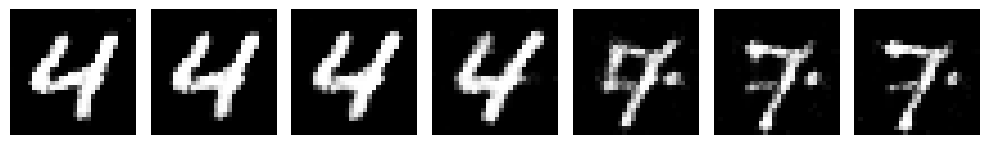

In [66]:
with torch.no_grad(): 
    fake_image_interp = G(z_interp).detach().cpu()
    fake_image_interp = fake_image_interp.view(7, 28, 28).cpu().detach()

fig, axs = plt.subplots(ncols = 7, figsize = (10, 5)) 
for i in range(7): 
    axs[i].imshow(fake_image_interp[i], cmap = 'gray')
    axs[i].axis('off')

plt.tight_layout()
#plt.savefig("GAN interpolated.png", dpi = 300)
plt.show()
# plt.figure(figsize=(10, 5))
# plt.axis("off")
# plt.title("Generated Images Interpolation")
# plt.imshow(np.transpose(vutils.make_grid(fake_image_interp, padding=2, normalize=True, nrow = 5), (1, 2, 0)))
# # 
# plt.show()